# Estimating Click - Through Rates (CTR)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_A, p_B, p_C]


Output()

Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([<Axes: title={'center': 'p_A'}>, <Axes: title={'center': 'p_B'}>,
       <Axes: title={'center': 'p_C'}>], dtype=object)

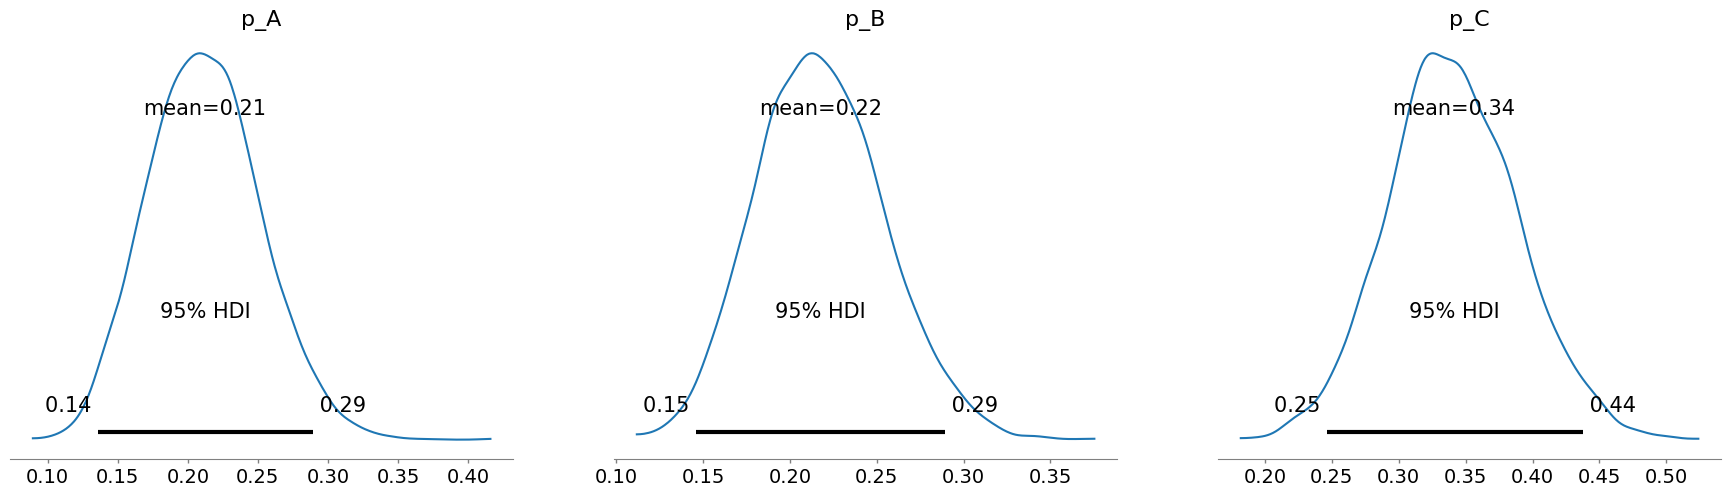

In [1]:
import pymc as pm
import arviz as az


ads = {"A": (100, 20), "B": (120, 25), "C": (90, 30)}

with pm.Model() as ctr_model:
    p = {}
    for ad, (n, x) in ads.items():
        p[ad] = pm.Beta(f"p_{ad}", alpha=2, beta=2)
        pm.Binomial(f"obs_{ad}", n=n, p=p[ad], observed=x)
    
    idata = pm.sample(3000, tune=2000, target_accept=0.95, chains=2)

az.plot_posterior(idata, var_names=["p_A","p_B","p_C"], hdi_prob=0.95)


# Example 3: Change-Point Detection in Crime Counts

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda]


Output()

Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'lambda'}>

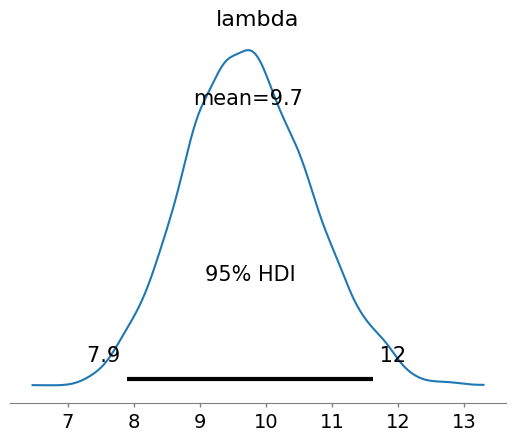

In [2]:
import numpy as np

data = np.array([12,9,11,13,8,14,10,7,12,9])

with pm.Model() as poisson_model:

    lam = pm.Gamma("lambda", alpha=2, beta=1)
    y_obs = pm.Poisson("y_obs", mu=lam, observed=data)
    idata = pm.sample(3000, tune=2000, target_accept=0.95, chains=2)

az.plot_posterior(idata, var_names=["lambda"], hdi_prob=0.95)


# Example 3: Change-Point Detection in Crime Counts

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [lambda1, lambda2]


Output()

Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 1 seconds.


array([<Axes: title={'center': 'tau'}>,
       <Axes: title={'center': 'lambda1'}>,
       <Axes: title={'center': 'lambda2'}>], dtype=object)

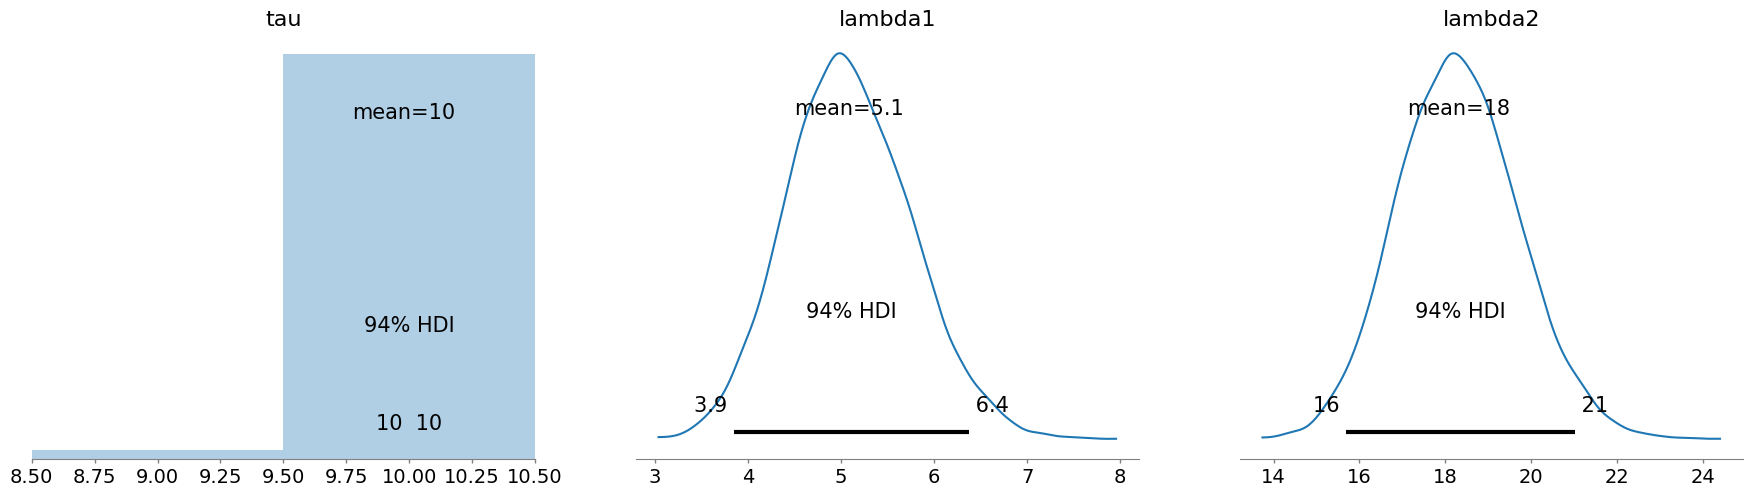

In [3]:
crime_counts = np.array([5,4,6,7,5,6,4,5,6,7,20,22,18,21,19,23,20,21])
T = len(crime_counts)
idx = np.arange(T)

with pm.Model() as crime_cp_model:

    tau = pm.DiscreteUniform("tau", lower=1, upper=T-1)
    lambda1 = pm.Exponential("lambda1", 1.0)
    lambda2 = pm.Exponential("lambda2", 1.0)
    lam = pm.math.switch(idx < tau, lambda1, lambda2)
    y_obs = pm.Poisson("y_obs", mu=lam, observed=crime_counts)
    
    idata = pm.sample(3000, tune=2000, target_accept=0.95)

az.plot_posterior(idata, var_names=["tau","lambda1","lambda2"])
